Paytm lacks an automated way to measure the effectiveness of its in-stadium advertisements and evaluate how well the camera angles used by ICC capture its logo. Manually analyzing hours of video footage is impractical and error-prone. To address this, Paytm requires a data-driven approach to analyze video streams, detect the Paytm logo, and quantify its visibility. This will enable Paytm to evaluate the impact of its advertisements  for television viewers .

In [131]:
'''import cv2
import os

def extract_frames(video_path, output_folder):
    """
    Extracts frames from a video and saves them as JPG images every second.
    
    :param video_path: Path to the input video file
    :param output_folder: Folder to save extracted frames
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    cap = cv2.VideoCapture(video_path)
    fps = int(cap.get(cv2.CAP_PROP_FPS))  # Get frames per second
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = total_frames // fps  # Get video duration in seconds
    expected_frames = duration  # Number of frames expected (1 per second)
    frame_interval = fps  # Capture one frame per second
    
    success, image = cap.read()
    count = 0
    frame_count = 0
    
    while success:
        if count % frame_interval == 0:
            frame_filename = os.path.join(output_folder, f"frame_{frame_count:04d}.jpg")
            cv2.imwrite(frame_filename, image)
            frame_count += 1
            print(f"Saved {frame_filename} ({frame_count}/{expected_frames})")
        
        success, image = cap.read()
        count += 1
    
    cap.release()
    print(f"Extracted {frame_count} frames (expected {expected_frames}) and saved to {output_folder}")

# Example usage
video_file = "/Users/rohaniyer/VS code/videoplayback (1).mp4"  # Change this to your video file path
output_directory = "/Users/rohaniyer/VS code/frames/"  # Directory to save frames
extract_frames(video_file, output_directory)



'''

'import cv2\nimport os\n\ndef extract_frames(video_path, output_folder):\n    """\n    Extracts frames from a video and saves them as JPG images every second.\n    \n    :param video_path: Path to the input video file\n    :param output_folder: Folder to save extracted frames\n    """\n    if not os.path.exists(output_folder):\n        os.makedirs(output_folder)\n    \n    cap = cv2.VideoCapture(video_path)\n    fps = int(cap.get(cv2.CAP_PROP_FPS))  # Get frames per second\n    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))\n    duration = total_frames // fps  # Get video duration in seconds\n    expected_frames = duration  # Number of frames expected (1 per second)\n    frame_interval = fps  # Capture one frame per second\n    \n    success, image = cap.read()\n    count = 0\n    frame_count = 0\n    \n    while success:\n        if count % frame_interval == 0:\n            frame_filename = os.path.join(output_folder, f"frame_{frame_count:04d}.jpg")\n            cv2.imwrite(fra

In [132]:
pip install ultralytics

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Installing necessary libraries

In [133]:
# Install ultralytics (YOLOv8)
!pip install ultralytics --quiet
!pip install opencv-python --quiet

import os
import cv2
import torch
from ultralytics import YOLO



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


extracting zip file

In [134]:
import zipfile
import os

zip_path = "/Users/rohaniyer/Desktop/mock5 copy/cardataset.zip"  # Change this to your actual file path
extract_to = "/Users/rohaniyer/Desktop/mock5 copy/carcrash"

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Dataset extracted successfully!")

Dataset extracted successfully!


In [135]:
import os
import shutil

# Define original dataset path (Read-Only or Original)
original_dataset_path = "/Users/rohaniyer/Desktop/mock5 copy/carcrash" #ensure this is the correct path

# Define new dataset path (Writable)
writable_dataset_path = "/Users/rohaniyer/Desktop/mock5 copy/carcrash/dataset"

try:
    # Create parent directories if they don't exist.
    os.makedirs(os.path.dirname(writable_dataset_path), exist_ok=True)

    # Copy dataset from input to working directory
    shutil.copytree(original_dataset_path, writable_dataset_path)

    print("Dataset copied successfully!")

except OSError as e:
    print(f"Error copying dataset: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Error copying dataset: [Errno 17] File exists: '/Users/rohaniyer/Desktop/mock5 copy/carcrash/dataset'


In [136]:
import random

# Define paths
image_dir = os.path.join(writable_dataset_path, "images")
label_dir = os.path.join(writable_dataset_path, "labels")

# Create train, val, test directories
splits = ["train", "val", "test"]
for split in splits:
    os.makedirs(os.path.join(writable_dataset_path, f"images/{split}"), exist_ok=True)
    os.makedirs(os.path.join(writable_dataset_path, f"labels/{split}"), exist_ok=True)

# List all image files
image_files = [f for f in os.listdir(image_dir) if f.endswith(".jpg")]

# Shuffle and split (70% train, 20% val, 10% test)
random.shuffle(image_files)
total_images = len(image_files)

train_split = int(0.7 * total_images)
val_split = int(0.9 * total_images)  # 70% train + 20% val = 90%, rest 10% is test

train_files = image_files[:train_split]
val_files = image_files[train_split:val_split]
test_files = image_files[val_split:]

# Function to move files
def move_files(file_list, split):
    for img_file in file_list:
        shutil.move(os.path.join(image_dir, img_file), os.path.join(writable_dataset_path, f"images/{split}", img_file))
        label_file = img_file.replace(".jpg", ".txt")
        if os.path.exists(os.path.join(label_dir, label_file)):
            shutil.move(os.path.join(label_dir, label_file), os.path.join(writable_dataset_path, f"labels/{split}", label_file))

# Move files to respective folders
move_files(train_files, "train")
move_files(val_files, "val")
move_files(test_files, "test")

print(f"Data split completed: {len(train_files)} training, {len(val_files)} validation, {len(test_files)} testing images.")


Data split completed: 0 training, 0 validation, 0 testing images.


TRAIN , VALIDATION , TEST split

In [137]:
import os
import shutil
import random
from glob import glob

# Define paths
dataset_path = "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset"
image_path = os.path.join(dataset_path, "images")
label_path = os.path.join(dataset_path, "labels")

# Output directories for YOLO format (CHANGE THIS TO A LOCAL PATH)
output_dir = "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset"  # Change this to your desired local output path

splits = ["train", "val", "test"]

for split in splits:
    os.makedirs(os.path.join(output_dir, f"images/{split}"), exist_ok=True)
    os.makedirs(os.path.join(output_dir, f"labels/{split}"), exist_ok=True)

# Get all images and shuffle them
all_images = glob(os.path.join(image_path, "*.jpg"))
random.shuffle(all_images)

# Split dataset (e.g., 70% train, 20% val, 10% test)
train_split = int(0.7 * len(all_images))
val_split = int(0.9 * len(all_images))  # 20% validation, 10% test

train_images = all_images[:train_split]
val_images = all_images[train_split:val_split]
test_images = all_images[val_split:]

# Function to move images and labels
def move_files(images, split):
    for img in images:
        img_filename = os.path.basename(img)
        label_filename = img_filename.replace(".jpg", ".txt")

        # Move image
        shutil.copy(img, os.path.join(output_dir, f"images/{split}/{img_filename}"))

        # Move corresponding label file (if exists)
        label_file = os.path.join(label_path, label_filename)
        if os.path.exists(label_file):
            shutil.copy(label_file, os.path.join(output_dir, f"labels/{split}/{label_filename}"))

# Move files to respective folders
move_files(train_images, "train")
move_files(val_images, "val")
move_files(test_images, "test")

print("Dataset successfully converted to YOLO format and split into train, val, and test!")

Dataset successfully converted to YOLO format and split into train, val, and test!


The bounding box annotations are used during training, and their role is:

The move_files() function ensures that both images and their corresponding .txt label files are copied into images/train, labels/train, etc.
The dataset.yaml file defines the dataset path so YOLO can automatically load the bounding boxes for training.
When YOLOv8 reads the dataset.yaml, it looks for the images and their corresponding labels in the labels/ folder.

In [138]:
import os

dataset_yaml = """
path: /Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset  # Change this to the actual path you used
train: /Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train
val: /Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/val
test: /Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/test

names:
  0: damage
"""

# Save the file (CHANGE THIS TO YOUR LOCAL PATH)
local_path = "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/dataset.yaml" # change this

# Create the parent directory if it doesn't exist.
os.makedirs(os.path.dirname(local_path), exist_ok=True)

with open(local_path, "w") as f:
    f.write(dataset_yaml)

print("dataset.yaml file created!")

dataset.yaml file created!


In [139]:
from ultralytics import YOLO
import torch

# Load YOLO model
model = YOLO("yolov8s.pt")

# Check if CUDA is available
if torch.cuda.is_available():
    # Train YOLO on Paytm dataset (GPU)
    model.train(data="/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/dataset.yaml", epochs=50, imgsz=640, batch=8, device=0)
else:
    print("CUDA is not available. Training on CPU.")
    model.train(data="/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/dataset.yaml", epochs=50, imgsz=640, batch=8, device="cpu")

CUDA is not available. Training on CPU.
New https://pypi.org/project/ultralytics/8.3.97 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.87 🚀 Python-3.9.6 torch-2.6.0 CPU (Apple M3 Pro)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/dataset.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classe

train: Scanning /Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/labels/train... 106 images, 0 backgrounds, 0 corrupt: 100%|██████████| 106/106 [00:00<00:00, 2949.37it/s]

train: New cache created: /Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/labels/val... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<00:00, 3360.28it/s]

val: New cache created: /Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/labels/val.cache
Plotting labels to runs/detect/train6/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train6
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      2.116      3.681      2.257          6        640: 100%|██████████| 14/14 [00:47<00:00,  3.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.67s/it]

                   all         10         19     0.0776      0.105     0.0199    0.00914

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       2/50         0G       1.89      2.611      2.075          4        640: 100%|██████████| 14/14 [00:45<00:00,  3.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.55s/it]

                   all         10         19      0.141      0.158     0.0548     0.0121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       3/50         0G      1.843      2.424      2.032          7        640: 100%|██████████| 14/14 [00:45<00:00,  3.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.52s/it]

                   all         10         19      0.122      0.211     0.0649      0.015

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       4/50         0G      1.826       2.46       1.99          2        640: 100%|██████████| 14/14 [00:45<00:00,  3.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.55s/it]

                   all         10         19     0.0788      0.316     0.0697     0.0205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       5/50         0G       1.93      2.445      2.048          9        640: 100%|██████████| 14/14 [00:46<00:00,  3.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.59s/it]

                   all         10         19     0.0402      0.158     0.0263    0.00637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       6/50         0G      2.027      2.372      2.088          7        640: 100%|██████████| 14/14 [00:44<00:00,  3.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.53s/it]

                   all         10         19     0.0636      0.211     0.0331    0.00686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       7/50         0G      2.104      2.526      2.202          5        640: 100%|██████████| 14/14 [00:45<00:00,  3.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.50s/it]

                   all         10         19      0.111      0.263     0.0563     0.0156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       8/50         0G      1.995      2.535      2.094          9        640: 100%|██████████| 14/14 [00:43<00:00,  3.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.51s/it]

                   all         10         19     0.0112      0.211     0.0107    0.00261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       9/50         0G      1.944      2.378      2.104          6        640: 100%|██████████| 14/14 [00:42<00:00,  3.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.50s/it]

                   all         10         19    0.00878     0.0526    0.00393   0.000737

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      10/50         0G      2.015      2.449      2.099          5        640: 100%|██████████| 14/14 [00:42<00:00,  3.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.48s/it]

                   all         10         19     0.0633      0.105      0.024    0.00826

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      11/50         0G      2.029      2.401      2.201          4        640: 100%|██████████| 14/14 [00:44<00:00,  3.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.50s/it]

                   all         10         19     0.0128     0.0526    0.00918    0.00191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      12/50         0G      2.056      2.358       2.14          7        640: 100%|██████████| 14/14 [00:42<00:00,  3.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.54s/it]

                   all         10         19     0.0285     0.0526    0.00875    0.00257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      13/50         0G      1.959       2.35      2.107          5        640: 100%|██████████| 14/14 [00:44<00:00,  3.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.49s/it]

                   all         10         19     0.0388      0.105     0.0169    0.00373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      14/50         0G      1.964      2.267      2.108          7        640: 100%|██████████| 14/14 [00:45<00:00,  3.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.50s/it]

                   all         10         19     0.0576      0.322     0.0397    0.00947

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      15/50         0G      2.045      2.396      2.147          6        640: 100%|██████████| 14/14 [00:41<00:00,  2.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.47s/it]

                   all         10         19      0.203      0.105     0.0553     0.0143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      16/50         0G      1.952      2.261      2.113          8        640: 100%|██████████| 14/14 [00:42<00:00,  3.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.49s/it]

                   all         10         19      0.174      0.105      0.038     0.0104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      17/50         0G      1.942      2.311      2.081         11        640: 100%|██████████| 14/14 [00:46<00:00,  3.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.50s/it]

                   all         10         19     0.0558      0.263     0.0346    0.00806

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      18/50         0G      1.968       2.22      2.148          8        640: 100%|██████████| 14/14 [00:47<00:00,  3.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.49s/it]

                   all         10         19     0.0203     0.0526     0.0254    0.00614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      19/50         0G      1.909      2.233      2.059          9        640: 100%|██████████| 14/14 [00:45<00:00,  3.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.47s/it]

                   all         10         19      0.078     0.0526     0.0419      0.012

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      20/50         0G      1.896       2.21      2.027          6        640: 100%|██████████| 14/14 [00:46<00:00,  3.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.52s/it]

                   all         10         19      0.263      0.105      0.142     0.0281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      21/50         0G      1.824      2.159       1.94          4        640: 100%|██████████| 14/14 [00:47<00:00,  3.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.48s/it]

                   all         10         19      0.118      0.316      0.111     0.0231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      22/50         0G      1.908      2.018       2.03         10        640: 100%|██████████| 14/14 [00:47<00:00,  3.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.50s/it]

                   all         10         19      0.192      0.211      0.115     0.0198

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      23/50         0G      1.846       2.07      1.903         10        640: 100%|██████████| 14/14 [00:42<00:00,  3.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.45s/it]

                   all         10         19     0.0996      0.211     0.0799     0.0177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      24/50         0G      1.784      1.982       1.92          5        640: 100%|██████████| 14/14 [00:44<00:00,  3.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.54s/it]

                   all         10         19     0.0627      0.105     0.0342    0.00976

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      25/50         0G      1.726      1.927      1.898          8        640: 100%|██████████| 14/14 [00:45<00:00,  3.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.46s/it]

                   all         10         19     0.0772      0.316     0.0687     0.0165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      26/50         0G      1.895      1.989      2.047          7        640: 100%|██████████| 14/14 [00:43<00:00,  3.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.49s/it]

                   all         10         19      0.199      0.368      0.119     0.0308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      27/50         0G      1.843      2.017      1.989          8        640: 100%|██████████| 14/14 [00:45<00:00,  3.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.54s/it]

                   all         10         19      0.196      0.316       0.15     0.0313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      28/50         0G      1.739      1.911       1.91          9        640: 100%|██████████| 14/14 [00:45<00:00,  3.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.50s/it]

                   all         10         19      0.144      0.316     0.0952     0.0217

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      29/50         0G      1.663      1.933      1.855          2        640: 100%|██████████| 14/14 [00:46<00:00,  3.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.50s/it]

                   all         10         19      0.133      0.158     0.0723     0.0133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      30/50         0G      1.698      1.865      1.877          7        640: 100%|██████████| 14/14 [00:42<00:00,  3.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.49s/it]

                   all         10         19      0.165      0.158     0.0773     0.0196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      31/50         0G      1.744      1.904      1.986          4        640: 100%|██████████| 14/14 [00:41<00:00,  2.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.47s/it]

                   all         10         19      0.145      0.474     0.0902     0.0192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      32/50         0G      1.655      1.809      1.844          5        640: 100%|██████████| 14/14 [00:40<00:00,  2.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.48s/it]

                   all         10         19      0.226      0.421      0.131     0.0297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      33/50         0G      1.623      1.727      1.784          7        640: 100%|██████████| 14/14 [00:39<00:00,  2.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.47s/it]

                   all         10         19      0.161      0.421      0.121     0.0222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      34/50         0G      1.622       1.81      1.814          4        640: 100%|██████████| 14/14 [00:42<00:00,  3.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.49s/it]

                   all         10         19      0.115      0.368     0.0783     0.0174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      35/50         0G      1.633      1.744      1.822          6        640: 100%|██████████| 14/14 [00:42<00:00,  3.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.50s/it]

                   all         10         19      0.209      0.263      0.111     0.0207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      36/50         0G      1.524      1.637      1.766          4        640: 100%|██████████| 14/14 [00:42<00:00,  3.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.48s/it]

                   all         10         19      0.192      0.211     0.0904     0.0241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      37/50         0G      1.566      1.698      1.774          5        640: 100%|██████████| 14/14 [00:40<00:00,  2.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.47s/it]

                   all         10         19      0.193      0.263      0.103     0.0244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      38/50         0G      1.597       1.74      1.811          6        640: 100%|██████████| 14/14 [00:42<00:00,  3.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.49s/it]

                   all         10         19      0.116      0.263     0.0617     0.0125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      39/50         0G      1.558      1.645      1.739         11        640: 100%|██████████| 14/14 [00:42<00:00,  3.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.44s/it]

                   all         10         19     0.0924      0.188     0.0605     0.0143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      40/50         0G      1.517      1.605      1.756          6        640: 100%|██████████| 14/14 [00:42<00:00,  3.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.43s/it]

                   all         10         19      0.169      0.211     0.0935     0.0253
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      41/50         0G      1.536      1.855      1.906          2        640: 100%|██████████| 14/14 [00:45<00:00,  3.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.53s/it]

                   all         10         19       0.13      0.263     0.0933     0.0285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      42/50         0G      1.517      1.653      1.845          2        640: 100%|██████████| 14/14 [00:42<00:00,  3.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.49s/it]

                   all         10         19      0.124      0.211      0.111     0.0288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      43/50         0G      1.461      1.584      1.863          3        640: 100%|██████████| 14/14 [00:42<00:00,  3.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.52s/it]

                   all         10         19      0.135      0.211      0.106     0.0279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      44/50         0G      1.392      1.566      1.791          2        640: 100%|██████████| 14/14 [00:43<00:00,  3.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.50s/it]

                   all         10         19       0.13      0.263     0.0819      0.019

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      45/50         0G      1.416      1.443      1.748          3        640: 100%|██████████| 14/14 [00:45<00:00,  3.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.52s/it]

                   all         10         19     0.0834      0.211     0.0813     0.0191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      46/50         0G       1.48      1.424      1.836          3        640: 100%|██████████| 14/14 [00:44<00:00,  3.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.53s/it]

                   all         10         19      0.117      0.421     0.0926      0.024

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      47/50         0G      1.347      1.361       1.73          3        640: 100%|██████████| 14/14 [00:44<00:00,  3.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.53s/it]

                   all         10         19     0.0915      0.316     0.0838     0.0244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      48/50         0G      1.334      1.301      1.742          2        640: 100%|██████████| 14/14 [00:45<00:00,  3.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.52s/it]

                   all         10         19      0.142      0.316     0.0907     0.0239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      49/50         0G      1.284      1.246      1.666          3        640: 100%|██████████| 14/14 [00:45<00:00,  3.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.46s/it]

                   all         10         19      0.177      0.263      0.103     0.0264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      50/50         0G      1.343      1.267      1.725          2        640: 100%|██████████| 14/14 [00:50<00:00,  3.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.54s/it]

                   all         10         19      0.232      0.263      0.111     0.0249

50 epochs completed in 0.640 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 22.5MB


Optimizer stripped from runs/detect/train6/weights/best.pt, 22.5MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.87 🚀 Python-3.9.6 torch-2.6.0 CPU (Apple M3 Pro)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.45s/it]


                   all         10         19      0.195      0.316      0.151     0.0313
Speed: 0.5ms preprocess, 134.7ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/train6



image 1/1 /Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000026.jpg: 448x640 3 damages, 85.6ms
Speed: 1.4ms preprocess, 85.6ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


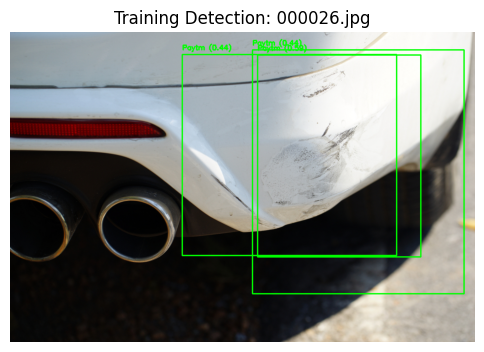


image 1/1 /Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000032.jpg: 448x640 1 damage, 82.7ms
Speed: 1.1ms preprocess, 82.7ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)


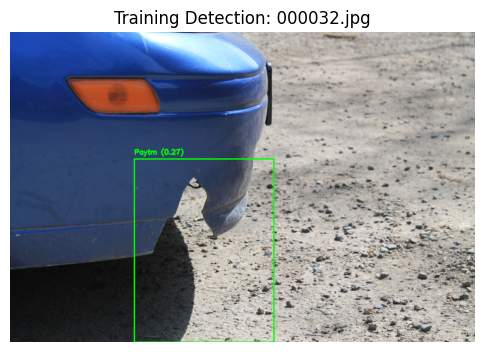


image 1/1 /Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000027.jpg: 448x640 3 damages, 85.8ms
Speed: 1.1ms preprocess, 85.8ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


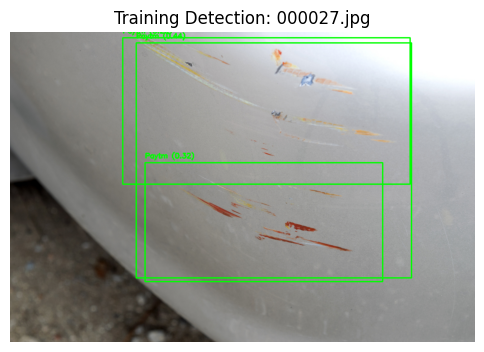


image 1/1 /Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000147.jpg: 448x640 2 damages, 78.3ms
Speed: 1.3ms preprocess, 78.3ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)


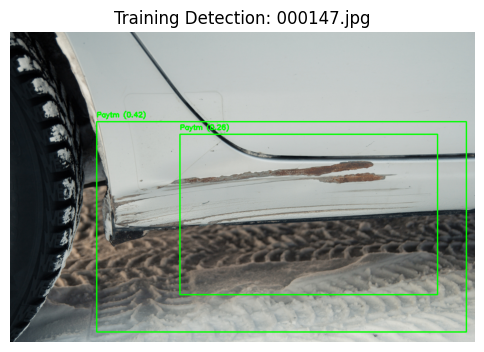


image 1/1 /Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000145.jpg: 640x448 1 damage, 80.7ms
Speed: 1.8ms preprocess, 80.7ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 448)


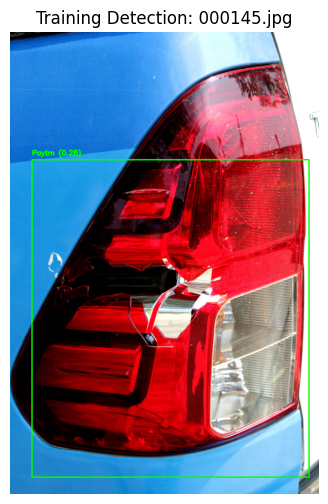

In [140]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import os

# Load trained YOLOv8 model
model = YOLO('/Users/rohaniyer/Desktop/mock5 copy/runs/detect/train/weights/best.pt')

# Define training image directory
train_image_dir = "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train"
train_images = os.listdir(train_image_dir)

# Select a few images for visualization
num_images_to_show = min(5, len(train_images))  # Show up to 5 images
selected_images = train_images[:num_images_to_show]

# Run inference and visualize
for img_name in selected_images:
    img_path = os.path.join(train_image_dir, img_name)
    
    # Run inference
    results = model(img_path)
    
    # Load image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib

    # Draw bounding boxes on image
    for box in results[0].boxes:
        x_min, y_min, x_max, y_max = map(int, box.xyxy[0])  # Bounding box coordinates
        confidence = box.conf[0].item()  # Confidence score
        class_id = int(box.cls[0].item())  # Class ID
        
        # Draw rectangle
        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
        label = f"Paytm ({confidence:.2f})"
        cv2.putText(img, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Show image
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Training Detection: {img_name}")
    plt.show()


Visualisations for different losses and other metrics

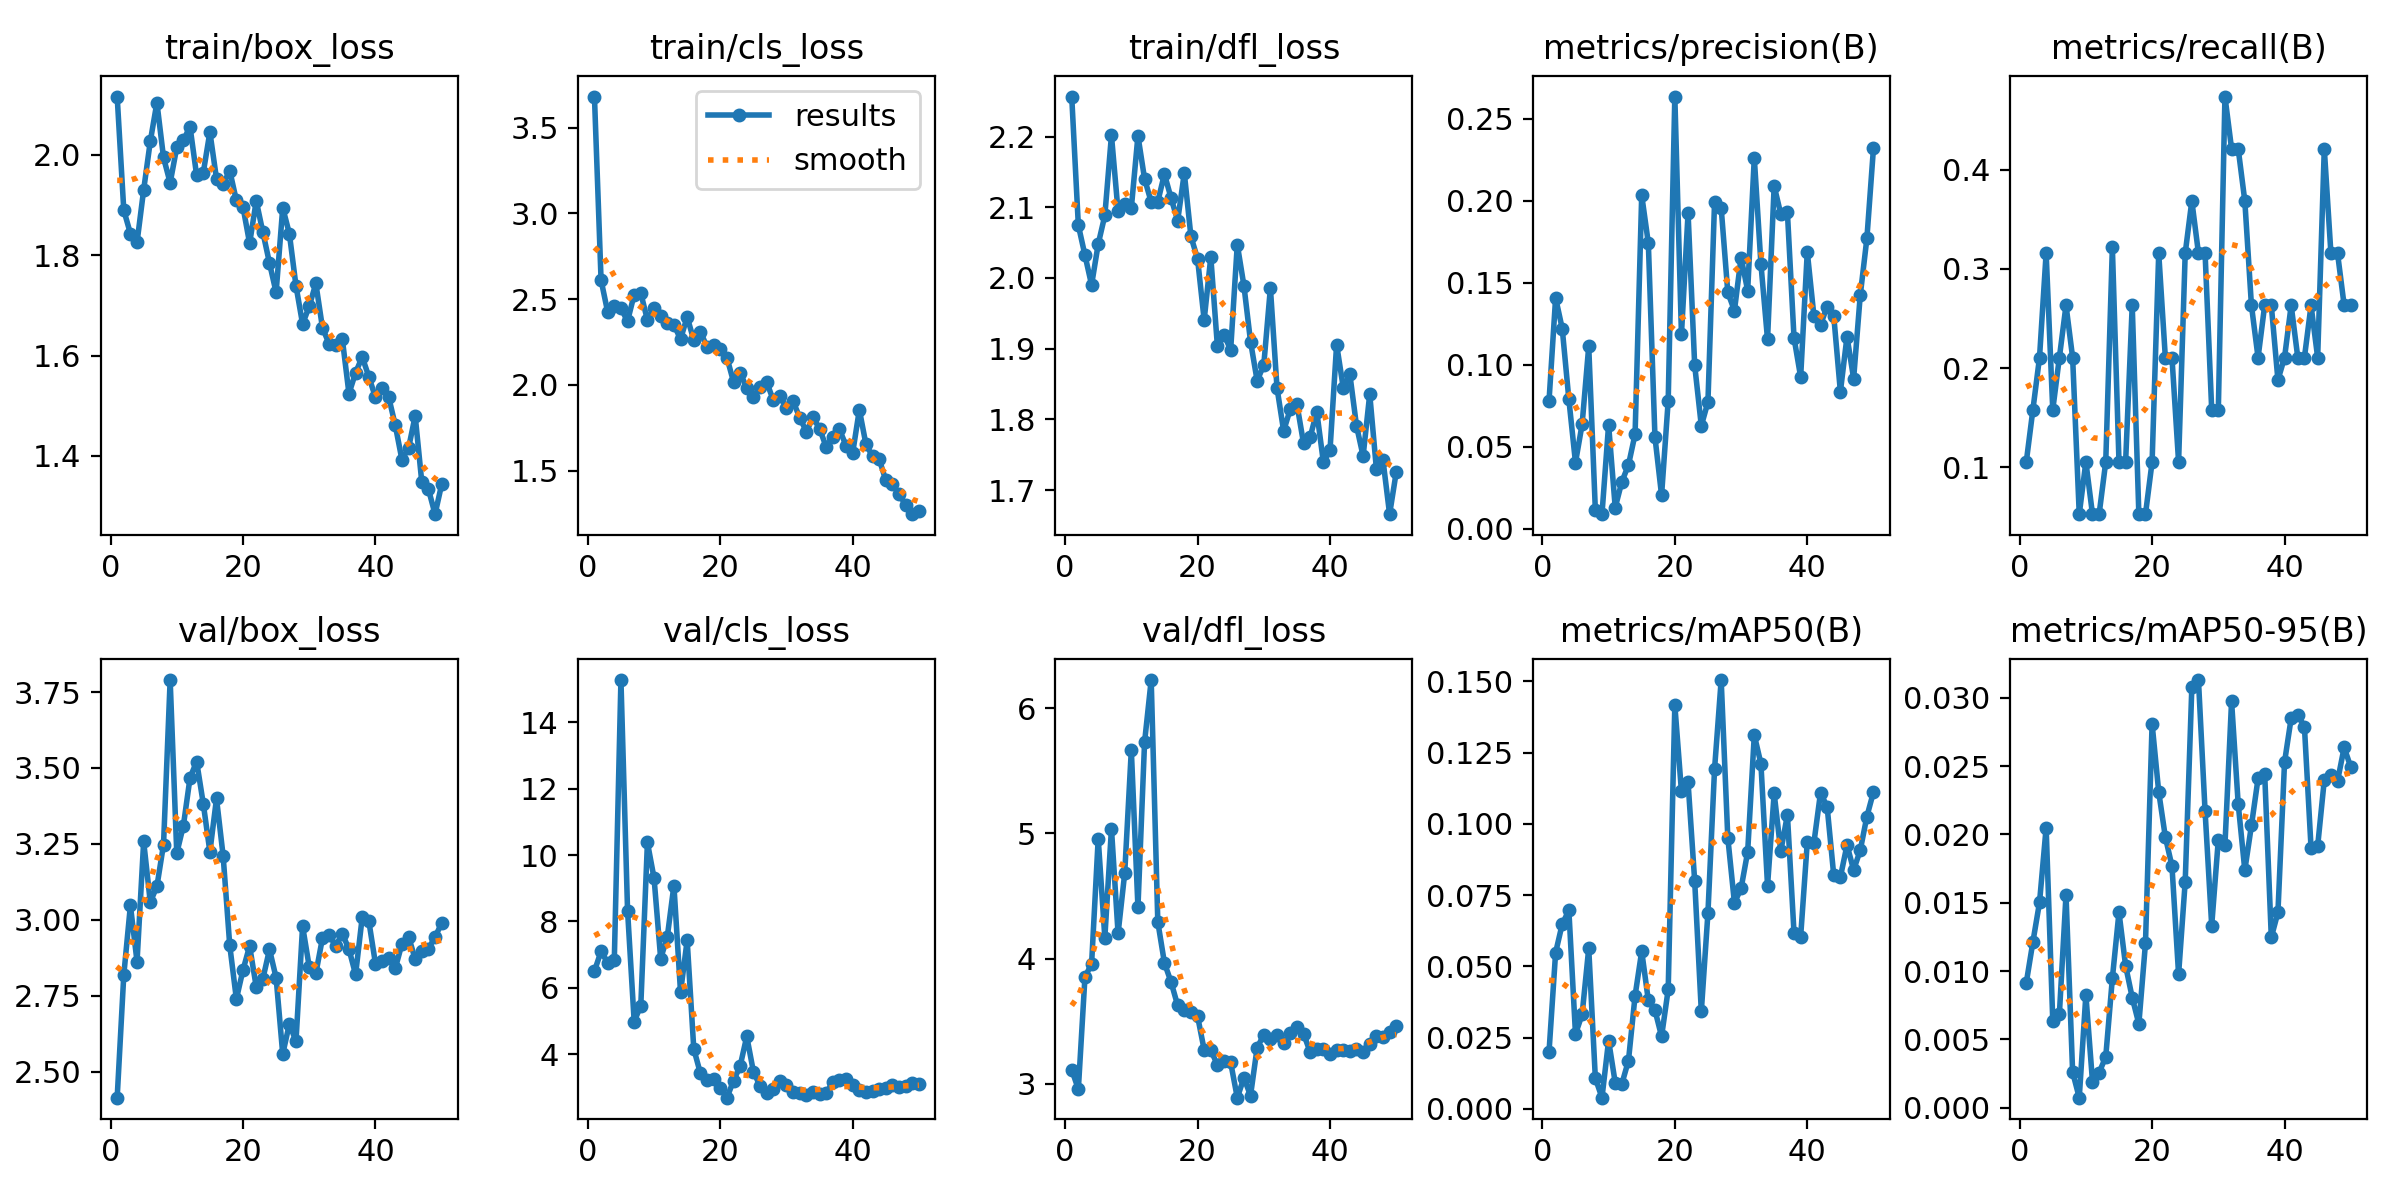

In [141]:
from IPython.display import display, Image
import os

# Assuming your training results are in a 'runs' directory, adjust the path accordingly.
# Replace 'your_training_run_directory' with the actual path to your training results.
training_run_directory = '/Users/rohaniyer/Desktop/mock5 copy/runs/detect/train' #replace with your path

results_png_path = os.path.join(training_run_directory, 'results.png')

# Check if the file exists before attempting to display it.
if os.path.exists(results_png_path):
    display(Image(filename=results_png_path))
else:
    print(f"Error: results.png not found at {results_png_path}")


image 1/1 /Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/test/000044.jpg: 448x640 1 damage, 72.4ms
Speed: 1.2ms preprocess, 72.4ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)


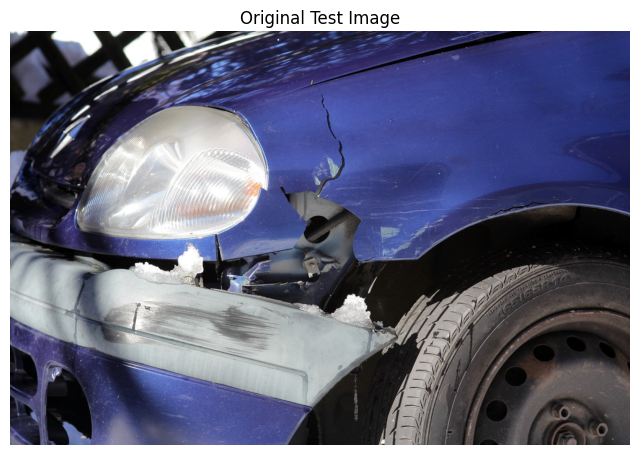

In [142]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import random

# Load trained model (Make sure to replace with the correct trained model path)
model = YOLO('/Users/rohaniyer/Desktop/mock5 copy/runs/detect/train/weights/best.pt')

# Define test image path
test_image_dir = "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/test"
test_images = os.listdir(test_image_dir)

# Select a random test image
sample_image = random.choice(test_images)
sample_image_path = os.path.join(test_image_dir, sample_image)

# Run inference
results = model(sample_image_path)

# Convert image to display format
image = cv2.imread(sample_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot original image
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis("off")
plt.title("Original Test Image")
plt.show()

# Show YOLOv8 predictions
results[0].show()



image 1/1 /Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/test/000015.jpg: 448x640 1 damage, 81.4ms
Speed: 1.4ms preprocess, 81.4ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


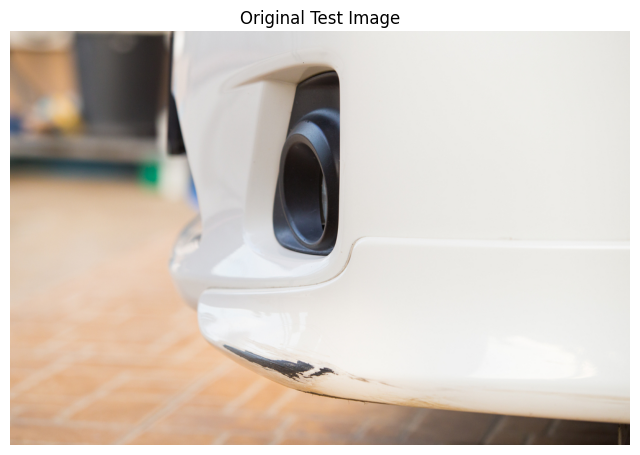

In [143]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import random

# Load trained model (Make sure to replace with the correct trained model path)
model = YOLO('/Users/rohaniyer/Desktop/mock5 copy/runs/detect/train/weights/best.pt')

# Define test image path
test_image_dir = "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/test"
test_images = os.listdir(test_image_dir)

# Select a random test image
sample_image = random.choice(test_images)
sample_image_path = "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/test/000015.jpg"

# Run inference
results = model(sample_image_path)

# Convert image to display format
image = cv2.imread(sample_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot original image
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis("off")
plt.title("Original Test Image")
plt.show()

# Show YOLOv8 predictions
results[0].show()


In [144]:
results = model("/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/test/000082.jpg")
print(results[0].show())


image 1/1 /Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/test/000082.jpg: 448x640 2 damages, 67.5ms
Speed: 1.9ms preprocess, 67.5ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)
None



image 1/13 /Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/test/000012.jpg: 448x640 3 damages, 78.8ms
image 2/13 /Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/test/000015.jpg: 448x640 1 damage, 65.6ms
image 3/13 /Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/test/000023.jpg: 448x640 1 damage, 69.1ms
image 4/13 /Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/test/000033.jpg: 640x448 5 damages, 62.3ms
image 5/13 /Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/test/000040.jpg: 448x640 1 damage, 59.1ms
image 6/13 /Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/test/000042.jpg: 448x640 3 damages, 55.8ms
image 7/13 /Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/test/000044.jpg: 448x640 1 damage, 54.9ms
image 8/13 /Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/test/000057.jpg: 448x640 4 damages, 57.9ms
image 9/13 /Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/

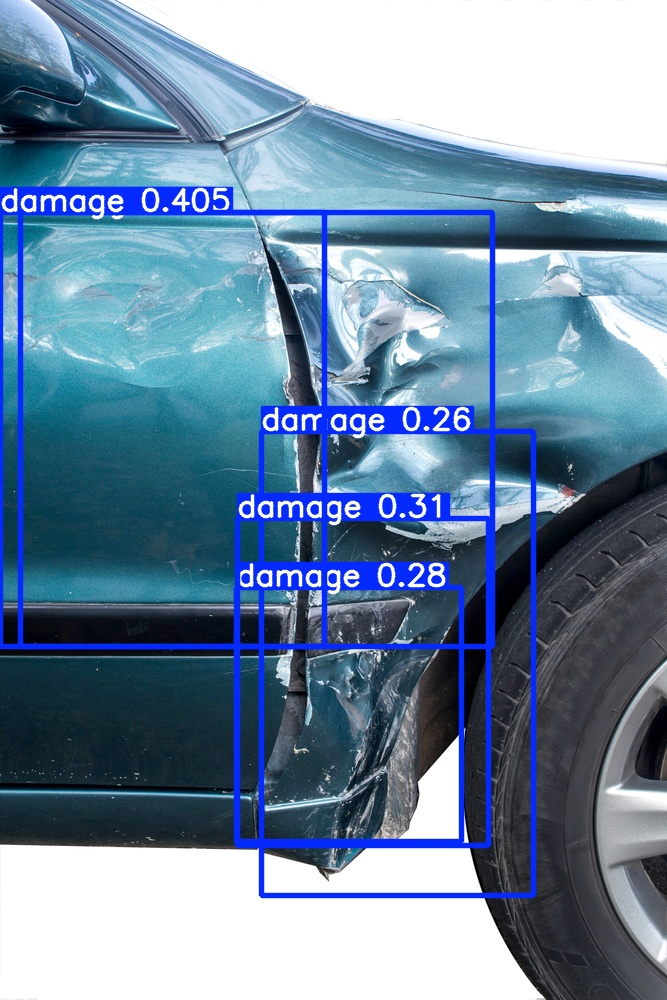

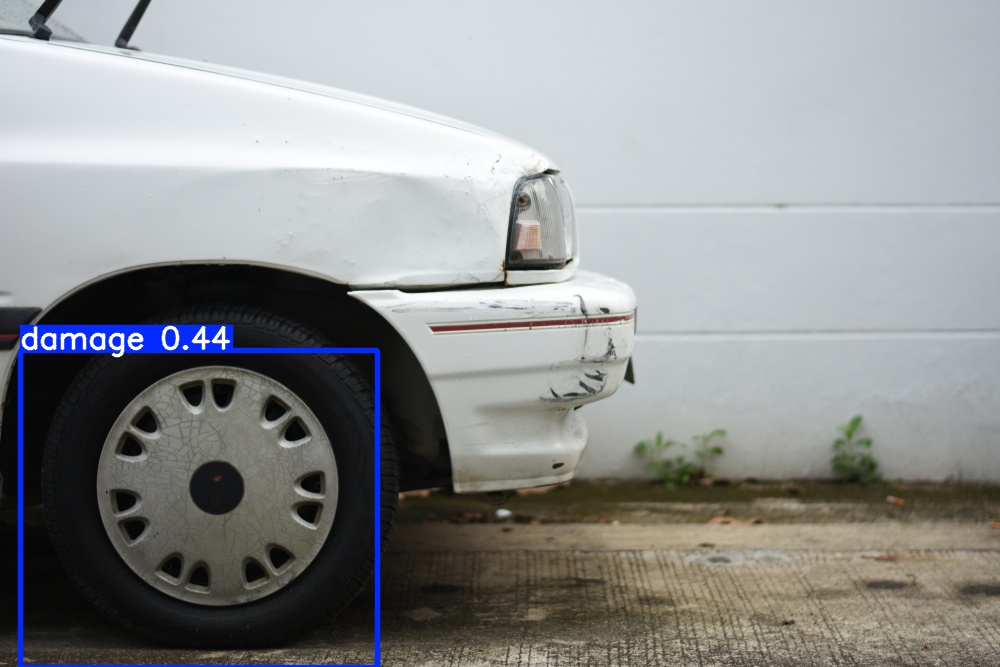

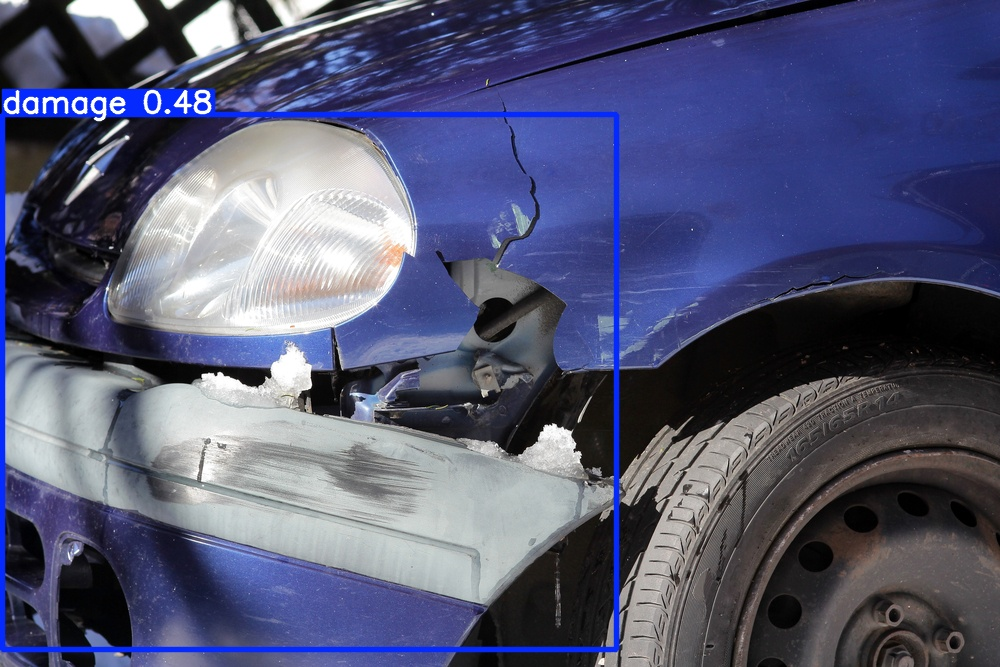

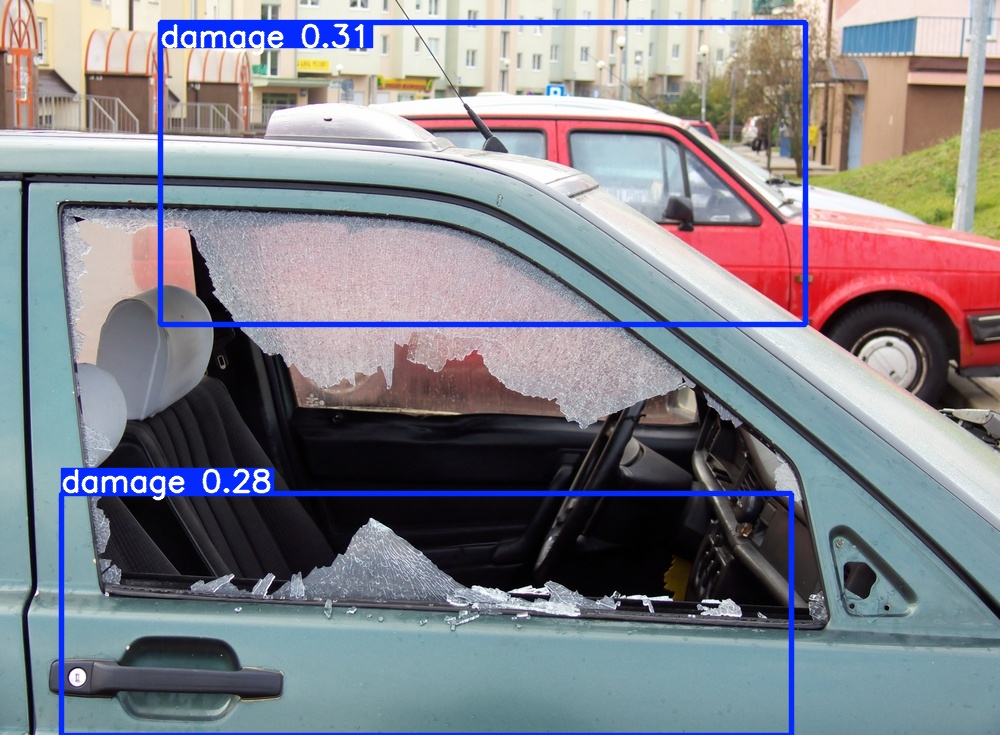

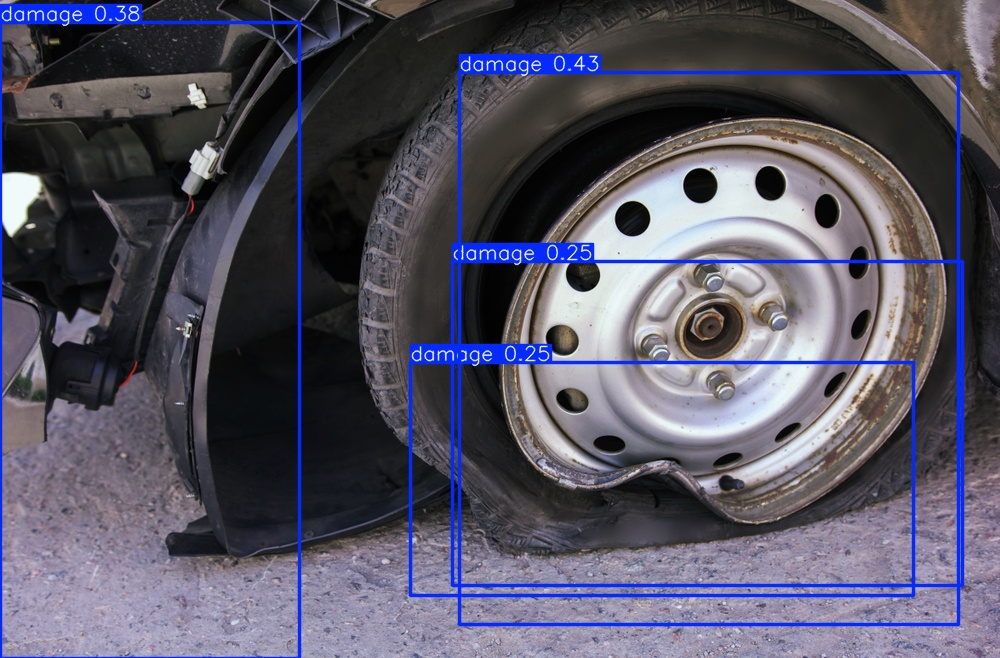

In [145]:
# Run inference on all test images
results = model(test_image_dir, save=True)

# Display processed images
output_dir = "/Users/rohaniyer/Desktop/mock5 copy/runs/detect/predict"  # YOLO saves predictions here
predicted_images = os.listdir(output_dir)

for img_file in predicted_images[:5]:  # Show first 5 predictions
    img_path = os.path.join(output_dir, img_file)
    display(Image(filename=img_path))


In [148]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define image path and severity
data = {
    "image_path": [
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000001.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000002.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000003.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000004.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000005.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000006.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000007.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000008.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000009.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000010.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000011.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000014.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000018.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000019.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000020.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000021.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000022.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000026.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000027.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000028.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000037.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000039.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000041.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000043.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000045.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000046.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000048.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000049.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000050.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000051.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000052.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000053.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000055.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000056.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000062.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000063.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000064.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000065.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000066.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000067.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000068.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000069.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000070.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000071.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000072.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000073.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000074.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000075.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000076.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000078.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000079.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000081.jpg",
        "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/train/000085.jpg"
    ],
    "severity": [
        "medium", "medium", "medium", "high", "high", "high", "high", "medium", "high", "high",
        "high", "high", "not damaged", "not damaged", "medium", "not damaged", "not damaged", "not damaged", "not damaged", "high",
        "high", "medium", "high", "medium", "medium", "medium", "high", "medium", "high", "high",
        "not damaged", "not damaged", "medium", "medium", "medium", "not damaged", "medium", "medium", "not damaged", "not damaged",
        "not damaged", "medium", "not damaged", "medium", "high", "high", "medium", "not damaged", "high", "not damaged",
        "not damaged", "medium", "medium"
    ]
}

df = pd.DataFrame(data)

# Save CSV
csv_path = "/Users/rohaniyer/Desktop/mock5 copy/carcrash/carcrash.csv"
df.to_csv(csv_path, index=False)

print(f"CSV created at: {csv_path}")

# Load CSV
df = pd.read_csv('/Users/rohaniyer/Desktop/mock5 copy/carcrash/carcrash.csv')

# Optional: Encode labels
label_map = {'not damaged': 0, 'medium': 1, 'high': 2}
df['label'] = df['severity'].map(label_map)

# Train/Validation Split
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)


CSV created at: /Users/rohaniyer/Desktop/mock5 copy/carcrash/carcrash.csv


In [149]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [151]:
import pandas as pd
import numpy as np
import os
import shutil
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models
from kerastuner.tuners import Hyperband
import tensorflow as tf

# -----------------------------
# Load CSV and Prepare Labels
# -----------------------------
df = pd.read_csv("/Users/rohaniyer/Desktop/mock5 copy/carcrash/carcrash.csv")
label_map = {'not damaged': 0, 'medium': 1, 'high': 2}
df['label'] = df['severity'].map(label_map)

# -----------------------------
# Extract and Normalize Images
# -----------------------------
def extract_image_features(df):
    images = []
    labels = []
    for _, row in tqdm(df.iterrows(), total=len(df)):
        img = load_img(row['image_path'], target_size=(128, 128))
        img_array = img_to_array(img) / 255.0
        images.append(img_array)
        labels.append(row['label'])
    return np.array(images), np.array(labels)

X_raw, y_raw = extract_image_features(df)
X_flat = X_raw.reshape((X_raw.shape[0], -1))

# -----------------------------
# Split Before SMOTE
# -----------------------------
X_train_flat, X_val_flat, y_train, y_val = train_test_split(
    X_flat, y_raw, test_size=0.2, stratify=y_raw, random_state=42
)

# -----------------------------
# Apply SMOTE to Train Set
# -----------------------------
print("Applying SMOTE to balance classes...")
smote = SMOTE(random_state=42)
X_train_flat_res, y_train_res = smote.fit_resample(X_train_flat, y_train)
X_train_res = X_train_flat_res.reshape((-1, 128, 128, 3))
X_val = X_val_flat.reshape((-1, 128, 128, 3))

# One-hot encode labels
y_train_cat = to_categorical(y_train_res, num_classes=3)
y_val_cat = to_categorical(y_val, num_classes=3)

# -----------------------------
# Data Augmentation
# -----------------------------
augmentor = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    brightness_range=[0.7, 1.3],
    channel_shift_range=10.0,
    horizontal_flip=True,
    fill_mode='nearest'
)
augmentor.fit(X_train_res)

# -----------------------------
# Keras Tuner Model Builder
# -----------------------------
def build_model(hp):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
    base_model.trainable = False

    model = models.Sequential()
    model.add(base_model)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(hp.Int('dense_units', min_value=64, max_value=256, step=64), activation='relu'))
    model.add(layers.Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(layers.Dense(3, activation='softmax'))

    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-4, 5e-4, 1e-3])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# -----------------------------
# Callbacks
# -----------------------------
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('/Users/rohaniyer/Desktop/mock5 copy/carcrash/best_tuned_model.h5',
                    monitor='val_loss', save_best_only=True)
]

# -----------------------------
# Clear Previous Tuner Directory
# -----------------------------
tuner_dir = 'tuner_dir/car_severity_tuning'
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)
    print(f"✅ Previous tuner directory '{tuner_dir}' has been deleted.")

# -----------------------------
# Keras Tuner Hyperband Search
# -----------------------------
tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='tuner_dir',
    project_name='car_severity_tuning'
)

print("🔍 Starting hyperparameter search...")
tuner.search(augmentor.flow(X_train_res, y_train_cat, batch_size=16),
             validation_data=(X_val, y_val_cat),
             epochs=25,
             callbacks=callbacks)

# -----------------------------
# Retrieve Best Hyperparameters
# -----------------------------
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)

# -----------------------------
# Initial Training (frozen base)
# -----------------------------
print("📦 Training top layers...")
model.fit(augmentor.flow(X_train_res, y_train_cat, batch_size=16),
          validation_data=(X_val, y_val_cat),
          epochs=10,
          callbacks=callbacks)

# -----------------------------
# Fine-Tune Base Model
# -----------------------------
print("🧠 Fine-tuning last 50 layers of MobileNetV2...")
base_model = model.layers[0]
base_model.trainable = True
for layer in base_model.layers[:-50]:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(augmentor.flow(X_train_res, y_train_cat, batch_size=16),
          validation_data=(X_val, y_val_cat),
          epochs=10,
          callbacks=callbacks)

# -----------------------------
# Save Final Model
# -----------------------------
final_model_path = '/Users/rohaniyer/Desktop/mock5 copy/carcrash/final_tuned_model.keras'
model.save(final_model_path)
print(f"✅ Final model saved at: {final_model_path}")


Trial 30 Complete [00h 00m 10s]
val_accuracy: 0.5454545617103577

Best val_accuracy So Far: 0.6363636255264282
Total elapsed time: 00h 04m 22s
📦 Training top layers...
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3403 - loss: 1.5603

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 325ms/step - accuracy: 0.3385 - loss: 1.5582 - val_accuracy: 0.2727 - val_loss: 1.3149
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.3438 - loss: 1.2525 - val_accuracy: 0.3636 - val_loss: 2.0760
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2214 - loss: 1.4045 - val_accuracy: 0.3636 - val_loss: 2.0837
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3333 - loss: 1.3209 - val_accuracy: 0.3636 - val_loss: 2.1938
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.3229 - loss: 1.3850 - val_accuracy: 0.1818 - val_loss: 2.1095
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.3021 - loss: 1.4070 - val_accuracy: 0.0909 - val_loss: 2.0871
🧠 Fine-tuning last 50 layers of MobileNetV2...
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 323ms/step - accuracy: 0.3568 - loss: 1.1372 - val_accuracy: 0.2727 - val_loss: 1.3155
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3576 - loss: 1.1356

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.3568 - loss: 1.1458 - val_accuracy: 0.2727 - val_loss: 1.3086
Epoch 3/10
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4688 - loss: 1.1172

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.4115 - loss: 1.1350 - val_accuracy: 0.2727 - val_loss: 1.3055
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.4609 - loss: 1.0898 - val_accuracy: 0.2727 - val_loss: 1.3062
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.2786 - loss: 1.1567 - val_accuracy: 0.2727 - val_loss: 1.3088
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.3047 - loss: 1.1341 - val_accuracy: 0.2727 - val_loss: 1.3088
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.2188 - loss: 1.1905 - val_accuracy: 0.2727 - val_loss: 1.3089
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3403 - loss: 1.1769

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.3385 - loss: 1.1652 - val_accuracy: 0.2727 - val_loss: 1.3011
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3021 - loss: 1.1745

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.3047 - loss: 1.1739 - val_accuracy: 0.2727 - val_loss: 1.2970
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.2639 - loss: 1.1615

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.2708 - loss: 1.1661 - val_accuracy: 0.2727 - val_loss: 1.2924
✅ Final model saved at: /Users/rohaniyer/Desktop/mock5 copy/carcrash/final_tuned_model.keras


In [152]:
pip install keras-tuner --upgrade


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [153]:
%matplotlib inline


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


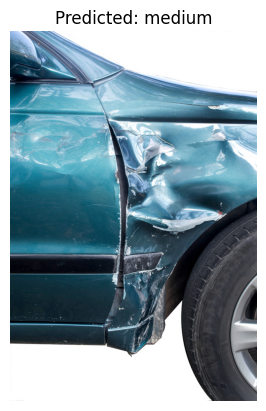

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


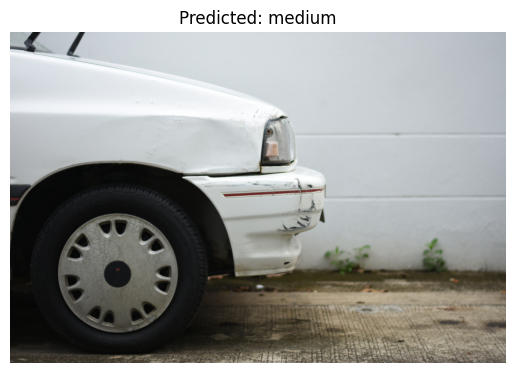

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


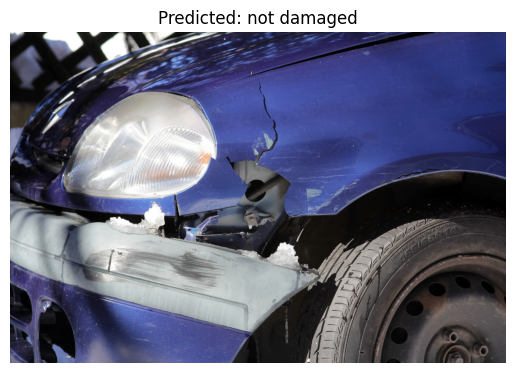

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


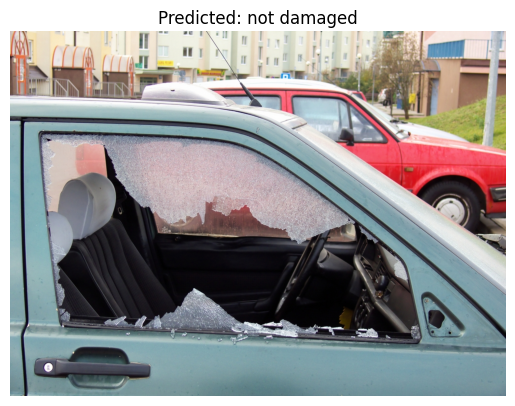

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


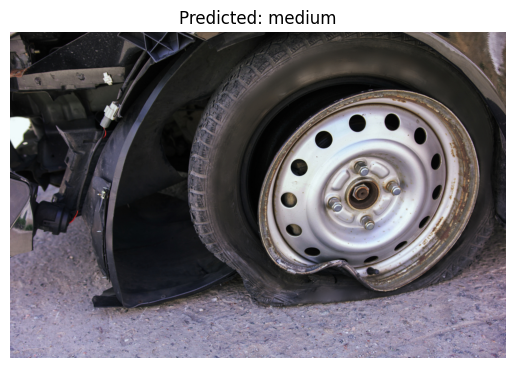

In [155]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Load best tuned model
model_path = "/Users/rohaniyer/Desktop/mock5 copy/carcrash/best_tuned_model.h5"
model = load_model(model_path)

# Define class labels
class_map = {0: 'not damaged', 1: 'medium', 2: 'high'}

# Test image directory
test_image_dir = "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/test"
test_images = os.listdir(test_image_dir)

# Predict and display
for img_file in test_images[:5]:  # First 5 test images
    img_path = os.path.join(test_image_dir, img_file)
    
    # Load and preprocess image
    img = load_img(img_path, target_size=(128, 128))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict
    prediction = model.predict(img_array)
    predicted_label = class_map[np.argmax(prediction)]
    
    # Show image with prediction
    plt.imshow(load_img(img_path))
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()


######


image 1/1 /Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/test/000033.jpg: 640x448 5 damages, 64.7ms
Speed: 1.5ms preprocess, 64.7ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 448)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


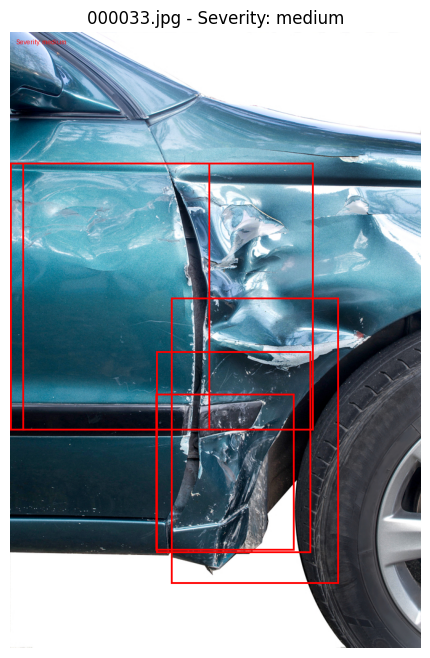


image 1/1 /Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/test/000023.jpg: 448x640 1 damage, 72.0ms
Speed: 5.8ms preprocess, 72.0ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


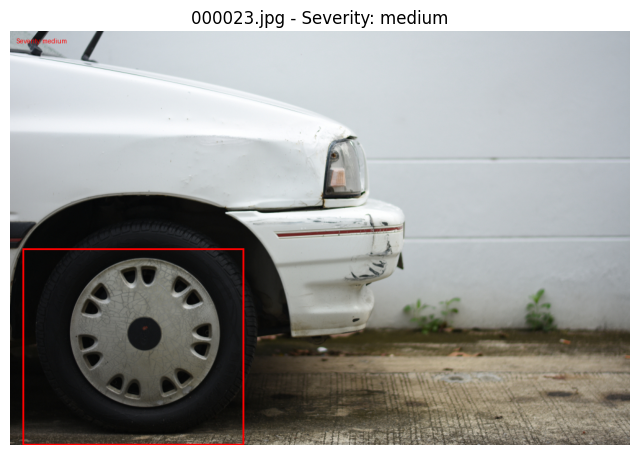


image 1/1 /Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/test/000044.jpg: 448x640 1 damage, 75.7ms
Speed: 1.5ms preprocess, 75.7ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


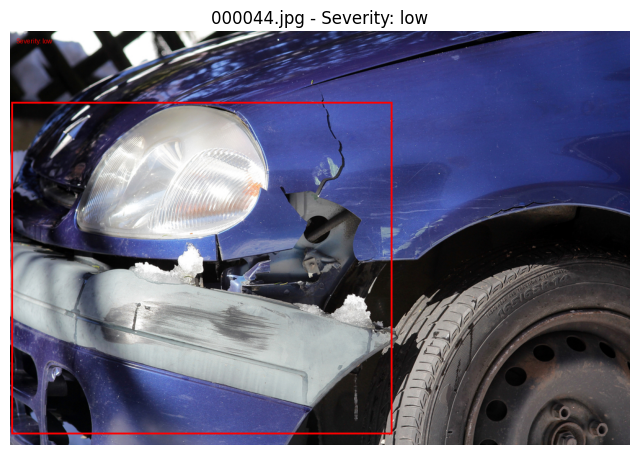


image 1/1 /Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/test/000090.jpg: 480x640 2 damages, 95.5ms
Speed: 1.3ms preprocess, 95.5ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


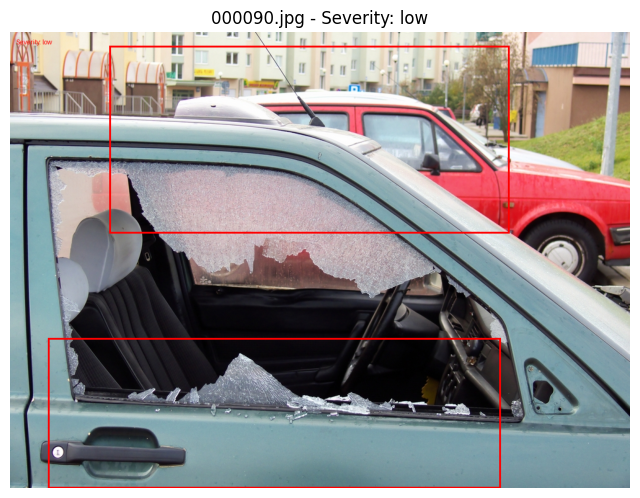


image 1/1 /Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/test/000057.jpg: 448x640 4 damages, 74.9ms
Speed: 1.3ms preprocess, 74.9ms inference, 0.2ms postprocess per image at shape (1, 3, 448, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


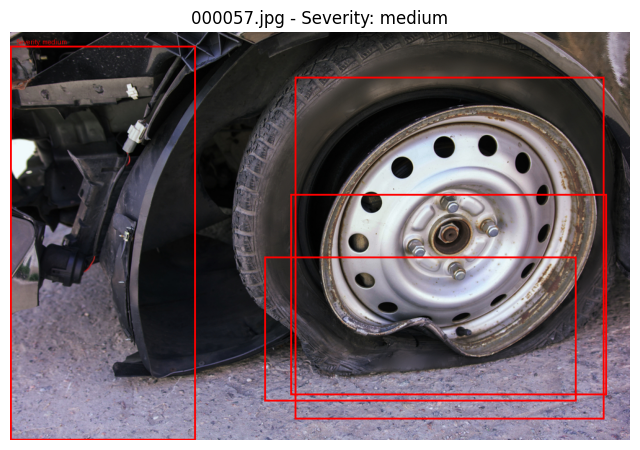

In [160]:
import os
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

# Load YOLO detection model
yolo_model_path = "/Users/rohaniyer/Desktop/mock5 copy/runs/detect/train/weights/best.pt"
yolo_model = YOLO(yolo_model_path)

# Load classification model
classifier_path = "/Users/rohaniyer/Desktop/mock5 copy/carcrash/best_tuned_model.h5"
classifier_model = load_model(classifier_path)

# Define class mapping
class_map = {0: 'low', 1: 'medium', 2: 'high'}

# Test image directory
test_image_dir = "/Users/rohaniyer/Desktop/mock5 copy/carcrash/cardataset/images/test"
test_images = os.listdir(test_image_dir)

# Loop through first 5 test images
for img_file in test_images[:5]:
    img_path = os.path.join(test_image_dir, img_file)

    # ---- YOLO DETECTION ----
    detection_results = yolo_model(img_path)

    # Load image with OpenCV for PIL overlay
    image_cv = cv2.imread(img_path)
    image_rgb = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)

    # Convert to PIL for drawing
    image_pil = Image.fromarray(image_rgb)
    draw = ImageDraw.Draw(image_pil)
    font = ImageFont.truetype("arial.ttf", 30) if os.name == "nt" else ImageFont.load_default()

    # Draw bounding boxes
    for box in detection_results[0].boxes.xyxy:
        x1, y1, x2, y2 = map(int, box)
        draw.rectangle([x1, y1, x2, y2], outline="red", width=3)

    # ---- CLASSIFICATION ----
    # Load and preprocess image for classifier
    img_for_class = load_img(img_path, target_size=(128, 128))
    img_array = img_to_array(img_for_class) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict class
    prediction = classifier_model.predict(img_array)
    predicted_label = class_map[np.argmax(prediction)]

    # Add classification text
    draw.text((10, 10), f"Severity: {predicted_label}", fill="red", font=font)

    # ---- DISPLAY ----
    plt.figure(figsize=(8, 8))
    plt.imshow(image_pil)
    plt.title(f"{img_file} - Severity: {predicted_label}")
    plt.axis('off')
    plt.show()


In [161]:
!pip install dash
!pip install dash-html-components
!pip install dash-core-components
!pip install ngrok

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [162]:
!pip install jupyter-dash

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [163]:
!pip install pyngrok

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [164]:
import os
os.system("fuser -k 8051/tcp")  # Replace 8051 with your port number


fuser: [-cfu] file ...
	-c	file is treated as mount point
	-f	the report is only for the named files
	-u	print username of pid in parenthesis


Unknown option: k


256

In [165]:
import os
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from ultralytics import YOLO
from PIL import Image, ImageDraw, ImageFont
import io
import base64

from dash import Dash, html, dcc, Output, Input, State
import dash_bootstrap_components as dbc

# Load models once
yolo_model = YOLO("/Users/rohaniyer/Desktop/mock5 copy/runs/detect/train/weights/best.pt")
classifier_model = load_model("/Users/rohaniyer/Desktop/mock5 copy/carcrash/best_tuned_model.h5")
class_map = {0: 'low', 1: 'medium', 2: 'high'}

# Initialize Dash app
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
app.title = "Crash Severity Detector"

app.layout = dbc.Container([
    html.H1("Crash Severity Detection", className="text-center my-4"),

    dcc.Upload(
        id='upload-image',
        children=html.Div([
            'Drag and Drop or ',
            html.A('Select an Image')
        ]),
        style={
            'width': '100%',
            'height': '80px',
            'lineHeight': '80px',
            'borderWidth': '2px',
            'borderStyle': 'dashed',
            'borderRadius': '10px',
            'textAlign': 'center',
            'margin-bottom': '20px'
        },
        multiple=False
    ),

    html.Div(id='output-image')
])

def process_image(contents):
    content_type, content_string = contents.split(',')
    decoded = base64.b64decode(content_string)

    img = Image.open(io.BytesIO(decoded)).convert('RGB')
    img_cv = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

    # Save to a temporary path
    temp_path = 'temp.jpg'
    cv2.imwrite(temp_path, img_cv)

    # Run YOLO detection
    detection_results = yolo_model(temp_path)

    # Draw bounding boxes
    image_pil = img.copy()
    draw = ImageDraw.Draw(image_pil)
    font = ImageFont.truetype("arial.ttf", 30) if os.name == "nt" else ImageFont.load_default()

    for box in detection_results[0].boxes.xyxy:
        x1, y1, x2, y2 = map(int, box)
        draw.rectangle([x1, y1, x2, y2], outline="red", width=3)

    # Classification
    img_for_class = img.resize((128, 128))
    img_array = img_to_array(img_for_class) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = classifier_model.predict(img_array)
    predicted_label = class_map[np.argmax(prediction)]

    draw.text((10, 10), f"Severity: {predicted_label}", fill="red", font=font)

    # Convert back to base64
    buffered = io.BytesIO()
    image_pil.save(buffered, format="PNG")
    encoded_img = base64.b64encode(buffered.getvalue()).decode()

    return html.Div([
        html.H4(f"Predicted Severity: {predicted_label}"),
        html.Img(src=f'data:image/png;base64,{encoded_img}', style={'width': '70%', 'marginTop': '20px'})
    ])

@app.callback(
    Output('output-image', 'children'),
    Input('upload-image', 'contents')
)
def update_output(contents):
    if contents:
        return process_image(contents)
    return html.Div("Upload an image to begin.")

if __name__ == '__main__':
    app.run_server(debug=True)



image 1/1 /Users/rohaniyer/Desktop/mock5 copy/temp.jpg: 448x640 3 damages, 82.8ms
Speed: 2.4ms preprocess, 82.8ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step

image 1/1 /Users/rohaniyer/Desktop/mock5 copy/temp.jpg: 640x448 5 damages, 88.7ms
Speed: 1.7ms preprocess, 88.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 448)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

image 1/1 /Users/rohaniyer/Desktop/mock5 copy/temp.jpg: 480x640 (no detections), 141.8ms
Speed: 1.7ms preprocess, 141.8ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

image 1/1 /Users/rohaniyer/Desktop/mock5 copy/temp.jpg: 384x640 2 damages, 106.4ms
Speed: 1.8ms preprocess, 106.4ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [ ]:
import os
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from ultralytics import YOLO
from PIL import Image, ImageDraw, ImageFont
import io
import base64

from dash import Dash, html, dcc, Output, Input
import dash_bootstrap_components as dbc
import plotly.graph_objs as go

# Load models once
yolo_model = YOLO("/Users/rohaniyer/Desktop/mock5 copy/runs/detect/train/weights/best.pt")
classifier_model = load_model("/Users/rohaniyer/Desktop/mock5 copy/carcrash/best_tuned_model.h5")
class_map = {0: 'low', 1: 'medium', 2: 'high'}

# Initialize Dash app
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
app.title = "Crash Severity Detector"

app.layout = dbc.Container([
    html.H1("Crash Severity Detection", className="text-center my-4"),

    dcc.Upload(
        id='upload-image',
        children=html.Div([
            'Drag and Drop or ',
            html.A('Select an Image')
        ]),
        style={
            'width': '100%',
            'height': '80px',
            'lineHeight': '80px',
            'borderWidth': '2px',
            'borderStyle': 'dashed',
            'borderRadius': '10px',
            'textAlign': 'center',
            'margin-bottom': '20px'
        },
        multiple=False
    ),

    html.Div(id='output-image')
])

def process_image(contents):
    content_type, content_string = contents.split(',')
    decoded = base64.b64decode(content_string)

    img = Image.open(io.BytesIO(decoded)).convert('RGB')
    img_cv = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

    # Save to a temporary path
    temp_path = 'temp.jpg'
    cv2.imwrite(temp_path, img_cv)

    # Run YOLO detection
    detection_results = yolo_model(temp_path)

    # Draw bounding boxes
    image_pil = img.copy()
    draw = ImageDraw.Draw(image_pil)
    font = ImageFont.truetype("arial.ttf", 30) if os.name == "nt" else ImageFont.load_default()

    for box in detection_results[0].boxes.xyxy:
        x1, y1, x2, y2 = map(int, box)
        draw.rectangle([x1, y1, x2, y2], outline="red", width=3)

    # Classification
    img_for_class = img.resize((128, 128))
    img_array = img_to_array(img_for_class) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = classifier_model.predict(img_array)[0]
    print("Prediction probabilities:", prediction)

    predicted_index = np.argmax(prediction)
    predicted_label = class_map[predicted_index]

    draw.text((10, 10), f"Severity: {predicted_label}", fill="red", font=font)

    # Convert image back to base64
    buffered = io.BytesIO()
    image_pil.save(buffered, format="PNG")
    encoded_img = base64.b64encode(buffered.getvalue()).decode()

    # Bar chart for prediction confidence
    classes = ['low', 'medium', 'high']
    fig = go.Figure(data=[
        go.Bar(
            x=classes,
            y=prediction,
            marker_color=['green', 'orange', 'red']
        )
    ])
    fig.update_layout(
        title="Prediction Confidence",
        xaxis_title="Severity Level",
        yaxis_title="Confidence",
        yaxis=dict(range=[0, 1]),
        height=300
    )

    return html.Div([
        html.H4(f"Predicted Severity: {predicted_label.capitalize()}"),
        html.Img(src=f'data:image/png;base64,{encoded_img}', style={'width': '70%', 'marginTop': '20px'}),
        dcc.Graph(figure=fig)
    ])

@app.callback(
    Output('output-image', 'children'),
    Input('upload-image', 'contents')
)
def update_output(contents):
    if contents:
        return process_image(contents)
    return html.Div("Upload an image to begin.")

if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
!pip install streamlit

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 7.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.2/731.2 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 14.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [ ]:
!pip install cohere

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 238.1 kB/s eta 0:00:00a 0:00:02
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.20
    Uninstalling urllib3-1.26.20:
      Successfully uninstalled urllib3-1.26.20
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
botocore 1.35.99 requires urllib3<1.27,>=1.25.4; python_version < "3.10", but you have urllib3 2.3.0 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


Final deployed dashboard with recommendations

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import cv2
import os
from ultralytics import YOLO
import base64
import flask
import subprocess
import cohere
from pyngrok import ngrok, conf

# --- Kill any previous Dash instance running on the same port ---
subprocess.run(["fuser", "-k", "8060/tcp"], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)

# --- Initialize Flask & Dash ---
server = flask.Flask(__name__)
app = dash.Dash(__name__, server=server, external_stylesheets=['https://cdn.jsdelivr.net/npm/bootstrap@5.3.0/dist/css/bootstrap.min.css'])

# --- Cohere API Setup ---
COHERE_API_KEY = "FfcIHQpackYBayHrJXa3LnaqCGqV7wteWOoTezNt"
co = cohere.Client(COHERE_API_KEY)

# --- Model Configuration ---
model_path = "/Users/rohaniyer/Downloads/mock5/runs/detect/train4/weights/best.pt"
image_dir = "/Users/rohaniyer/Downloads/mock5/paytm-dataset/images/test"
confidence_thresholds = {"visible": 0.7, "partially_visible": 0.4}

# --- Load YOLO Model ---
model = YOLO(model_path)

# --- Fetch Test Images ---
test_images = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]

# --- Convert Paytm Logo to Base64 ---
paytm_logo_path = "/Users/rohaniyer/Downloads/mock5/Paytm-Logo.png"

def encode_image(image_path):
    with open(image_path, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode('utf-8')

paytm_logo_base64 = encode_image(paytm_logo_path)
paytm_logo_url = f"data:image/png;base64,{paytm_logo_base64}"

# --- Function to classify visibility ---
def classify_visibility(image_path, model, confidence_thresholds):
    results = model(image_path)
    if not results[0].boxes:
        return "Not Visible", 0.0
    max_confidence = max(box.conf[0].item() for box in results[0].boxes)
    if max_confidence >= confidence_thresholds["visible"]:
        return "Visible", max_confidence
    elif max_confidence >= confidence_thresholds["partially_visible"]:
        return "Partially Visible", max_confidence
    else:
        return "Not Visible", max_confidence

# --- Function to Get Advertising Suggestions from Cohere ---
def get_advertising_suggestions(confidence):
    response = co.chat(
        model='command-r-plus',
        message=f"The confidence score of the Paytm logo visibility in a cricket match is {confidence:.2f}. How can Paytm improve their advertising strategy to increase visibility? Give it 4 exact points to improve their advertisement with respect to their presence within the ICC match frames.If it is low confidence score that means visibility is an issue and focus more on visibility solutions"
    )
    return response.text if response.text else "No suggestions available."

import base64

# Convert the image to Base64
background_image_path = "/Users/rohaniyer/Downloads/mock5/background.png"

def encode_image(image_path):
    with open(image_path, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode('utf-8')

background_base64 = encode_image(background_image_path)
background_url = f"data:image/png;base64,{background_base64}"

# --- Dash Layout ---
app.layout = html.Div(
    style={
        "backgroundImage": f"url('{background_url}')",  # Use Base64 encoded image
        "backgroundSize": "cover",
        "backgroundPosition": "center",
        "backgroundRepeat": "no-repeat",
        "minHeight": "100vh",
        "padding": "20px",
        "color": "#ffffff",  # Ensure text is readable
    },
    children=[
        html.Div(className="text-center", children=[
            html.Img(src=paytm_logo_url, style={"width": "200px", "marginBottom": "20px"}),
        ]),
        
        html.Div(className="card shadow p-4", 
            style={"backgroundColor": "rgba(18,18,18,0.8)", "color": "#ffffff", "borderRadius": "10px"}, 
            children=[
                dcc.Dropdown(
                    id='image-dropdown',
                    options=[{'label': image, 'value': image} for image in test_images],
                    value=test_images[0] if test_images else None,
                    placeholder="Select an image",
                    className="form-select"
                ),
            ]
        ),

        html.Div(className="card shadow mt-4 p-4", 
            style={"backgroundColor": "rgba(18,18,18,0.8)", "color": "#ffffff", "borderRadius": "10px"}, 
            children=[
                html.Div(className="text-center", children=[
                    html.Img(id='image-output', src='', className="img-fluid rounded border"),
                ]),
                html.Div(id='classification-output', className="text-center mt-3 fw-bold fs-4"),
                html.Div(id='confidence-output', className="text-center mt-2 fs-5 text-secondary"),
                
                # --- Collapsible Section for Advertising Suggestions ---
                html.Details(
                    children=[
                        html.Summary("Click to see advertising suggestions", className="fw-bold text-primary"),
                        html.Pre(id='suggestion-output', className="mt-2 text-light", style={"whiteSpace": "pre-wrap"})
                    ]
                )
            ]
        ),
    ]
)


# --- Callback to Process Image ---
@app.callback(
    [Output('image-output', 'src'), Output('classification-output', 'children'), Output('confidence-output', 'children'), Output('suggestion-output', 'children')],
    [Input('image-dropdown', 'value')]
)
def update_image(selected_image):
    if selected_image:
        image_path = os.path.join(image_dir, selected_image)
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        results = model(image_path)
        visibility, confidence = classify_visibility(image_path, model, confidence_thresholds)
        
        # Draw bounding boxes
        for box in results[0].boxes:
            x_min, y_min, x_max, y_max = map(int, box.xyxy[0])
            conf = box.conf[0].item()
            cv2.rectangle(image_rgb, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
            label = f"Paytm ({conf:.2f})"
            cv2.putText(image_rgb, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        _, encoded_image = cv2.imencode('.jpg', image_rgb)
        image_base64 = base64.b64encode(encoded_image).decode('utf-8')
        image_src = f"data:image/jpeg;base64,{image_base64}"
        
        suggestion = get_advertising_suggestions(confidence)
        
        visibility_class = "text-success" if visibility == "Visible" else "text-warning" if visibility == "Partially Visible" else "text-danger"
        
        return image_src, html.Span(f"Visibility: {visibility}", className=visibility_class), f"Confidence: {confidence:.2f}", suggestion
    else:
        return '', '', '', ''

# --- Run the App ---
if __name__ == '__main__':
    # --- OPTIONAL: Ngrok Tunnel Setup ---
    enable_ngrok =  True  # Set to True if you want ngrok

    if enable_ngrok:
        NGROK_AUTHTOKEN = "2uTteS5SvXFvSNQSQaMha9hoMlY_896FAuCapMPVpP11Dtkot"  # Replace with your authtoken
        pyngrok_config = conf.get_default()
        ngrok.set_auth_token(NGROK_AUTHTOKEN, pyngrok_config=pyngrok_config)
        ngrok.kill()
        public_url = ngrok.connect(8060, pyngrok_config=pyngrok_config)
        print(f" * ngrok tunnel available at: {public_url}")

    # --- Start Dash App ---
    app.run_server(debug=True, port=8060, host="0.0.0.0")


 * ngrok tunnel available at: NgrokTunnel: "https://edea-59-152-53-106.ngrok-free.app" -> "http://localhost:8060"



image 1/1 /Users/rohaniyer/Downloads/mock5/paytm-dataset/images/test/frame_1680_jpg.rf.0c2411855a7d1992652a46cea8eecee3.jpg: 640x640 (no detections), 132.7ms
Speed: 3.1ms preprocess, 132.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /Users/rohaniyer/Downloads/mock5/paytm-dataset/images/test/frame_1680_jpg.rf.0c2411855a7d1992652a46cea8eecee3.jpg: 640x640 (no detections), 105.9ms
Speed: 1.8ms preprocess, 105.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /Users/rohaniyer/Downloads/mock5/paytm-dataset/images/test/frame_2560.jpg: 384x640 2 paytm_logos, 78.8ms
Speed: 1.2ms preprocess, 78.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /Users/rohaniyer/Downloads/mock5/paytm-dataset/images/test/frame_2560.jpg: 384x640 2 paytm_logos, 129.3ms
Speed: 0.8ms preprocess, 129.3ms inference, 18.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /Users/rohaniyer/Downloads/mock5/paytm-dataset